In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv("./mad1_alcoholic_drinks.csv", encoding="latin")
df

,id,ean,name,legal_name,unit_price,is_discounted,previous_price,origin,supplier,weight,category,age_check,alcohol_by_volume,is_new,is_pack,pack_size
0,66211,8480000662118,Vino tinto Casón Histórico,Vino tinto sin DOP/IGP,1.05,False,NaN,Producto de España,"García Carrión 1890, S.L.",1.00,Bodega,True,13.0,False,False,NaN
1,66107,8410261271101,Vino tinto Don Simón,Vino tinto,1.60,False,NaN,Producto de España,JGC S.A,1.00,Bodega,True,12.0,False,False,NaN
2,66710,8436612580005,Vino tinto tempranillo Elegido,Vino Tinto,2.00,False,NaN,España,"Terra Cellars, S.L.U.",1.00,Bodega,True,13.0,False,False,NaN
3,37808,8412423110068,Vino tinto Dominio de Borgia,Vino de mesa tinto,2.70,False,NaN,España,"Bodegas Borsao, S.A.",2.00,Bodega,True,13.5,False,False,NaN
4,66960,8410275002135,Vino tinto Masía de Altigón,Vino tinto,5.55,False,NaN,Sin IGP,"Bodegas EL Villar, S.C.V.",5.00,Bodega,True,13.0,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,27175,8410793066138,"Cerveza sin gluten Free Damm 0,0% sin alcohol","Cerveza Sin Alcohol 0,0 sin gluten",0.74,False,NaN,EU,DAMM S.A.,0.33,Bodega,True,NaN,False,False,NaN
232,66560,8411327000802,Cerveza sin alcohol Mahou,CERVEZA SIN ALCOHOL,8.28,False,NaN,España,"MAHOU, S.A.",3.96,Bodega,True,0.8,False,True,0.33
233,27126,8411327722018,Cerveza sin alcohol Mahou,CERVEZA SIN ALCOHOL,0.70,False,NaN,España,"MAHOU, S.A.",0.33,Bodega,True,0.8,False,False,NaN
234,13417,8413041318041,"Cerveza 0,0% sin alcohol tostada Falke",Cerveza sin alcohol,5.76,False,NaN,NaN,Heineken España S.A.,3.96,Bodega,True,NaN,False,True,0.33


In [45]:
df['alcohol_by_volume'] = df["alcohol_by_volume"].fillna(0)
df = df[~df["is_discounted"]]

In [46]:
df["alcohol_per_liter"] = (df["alcohol_by_volume"]/100) * df["weight"]
df["alcohol_per_euro"] = df["alcohol_per_liter"] / df["unit_price"]

df = df.sort_values(by="alcohol_per_euro", ascending=False).nlargest(
    10, "alcohol_per_euro"
)

df.drop(columns=["legal_name", "previous_price", "supplier", "age_check", "origin", "is_discounted", "is_new", "is_pack", "pack_size"])

,id,ean,name,unit_price,weight,category,alcohol_by_volume,alcohol_per_liter,alcohol_per_euro
0,66211,8480000662118,Vino tinto Casón Histórico,1.05,1.00,Bodega,13.0,0.1300,0.123810
45,66127,8480000661272,Vino blanco Casón Histórico,0.90,1.00,Bodega,11.0,0.1100,0.122222
4,66960,8410275002135,Vino tinto Masía de Altigón,5.55,5.00,Bodega,13.0,0.6500,0.117117
5,37804,8413557700071,Vino tinto Hacienda Zargón,5.55,5.00,Bodega,13.0,0.6500,0.117117
39,37802,8412423110075,Vino rosado Dominio de Borgia,2.40,2.00,Bodega,13.5,0.2700,0.112500
3,37808,8412423110068,Vino tinto Dominio de Borgia,2.70,2.00,Bodega,13.5,0.2700,0.100000
1,66107,8410261271101,Vino tinto Don Simón,1.60,1.00,Bodega,12.0,0.1200,0.075000
12,37139,8411767020811,Vino tinto D.O La Mancha Fidencio,1.35,0.75,Bodega,13.0,0.0975,0.072222
48,66105,8410261273105,Vino blanco Don Simón,1.60,1.00,Bodega,11.0,0.1100,0.068750
75,66922,8480000669223,Sangría Casón Histórico,1.60,1.50,Bodega,7.0,0.1050,0.065625


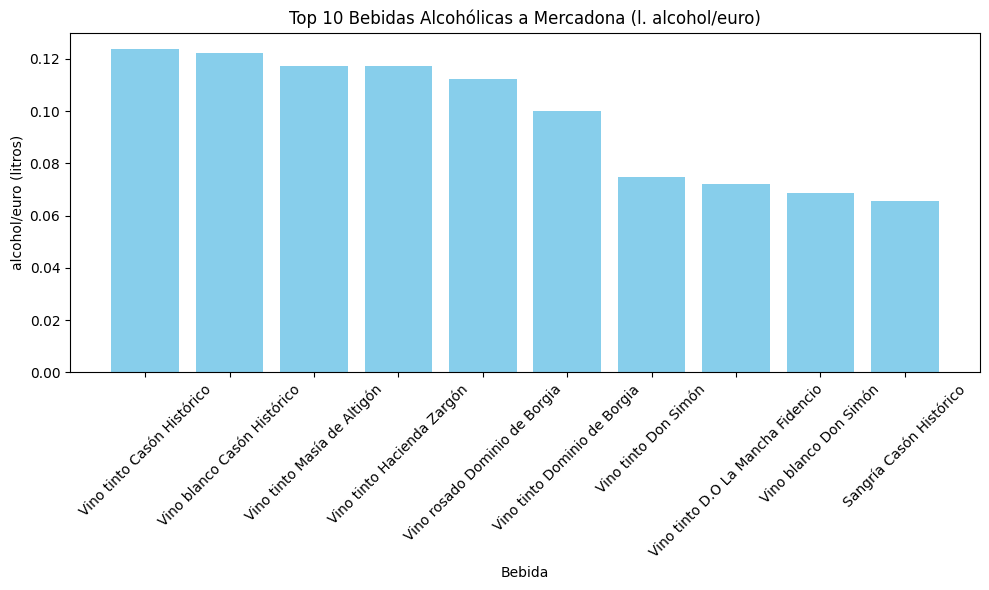

In [47]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(df["name"], df["alcohol_per_euro"], color="skyblue")
plt.title("Top 10 Bebidas Alcohólicas a Mercadona (l. alcohol/euro)")
plt.xlabel("Bebida")
plt.ylabel("alcohol/euro (litros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()